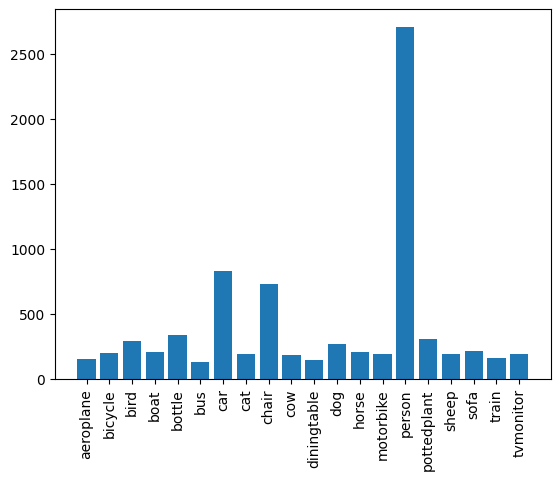

In [12]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

voc_root = "/home/jialin/data/VOC"

transform = transforms.Compose([transforms.ToTensor()])
voc_dataset = datasets.VOCDetection(voc_root, year='2007', image_set='train', download=False, transform=transform)
voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

class_objects = [0] * 20
for _, target in voc_dataset:
    for obj in target['annotation']['object']:
        class_objects[voc_classes.index(obj['name'])] += 1

plt.bar(voc_classes, class_objects)
plt.xticks(rotation=90)
plt.show()


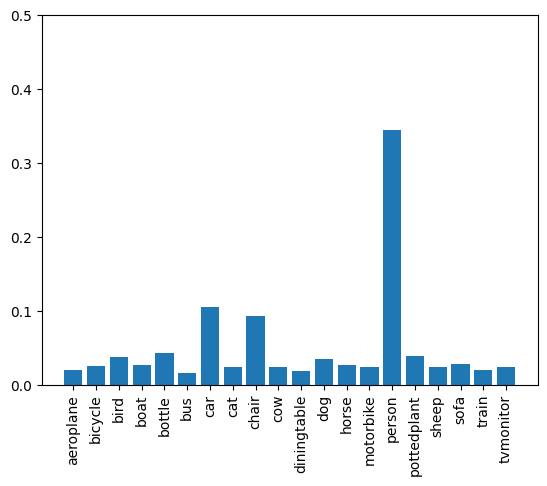

In [13]:
total_num = sum(class_objects)
class_objects = [i / total_num for i in class_objects]

plt.bar(voc_classes, class_objects)
plt.xticks(rotation=90)
plt.ylim(0, 0.5)
plt.show()

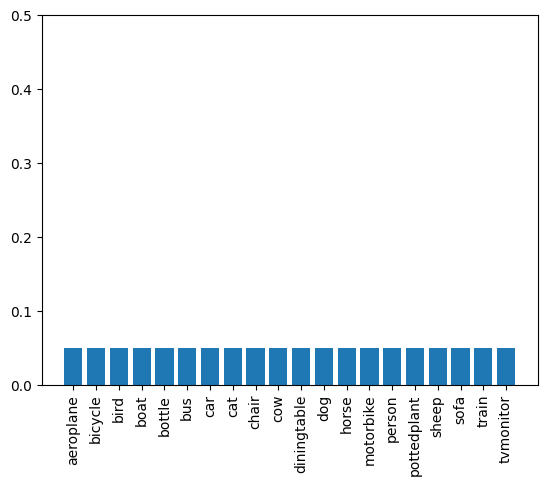

In [14]:
class_objects = [0.05] * 20

plt.bar(voc_classes, class_objects)
plt.xticks(rotation=90)
plt.ylim(0, 0.5)
plt.show()

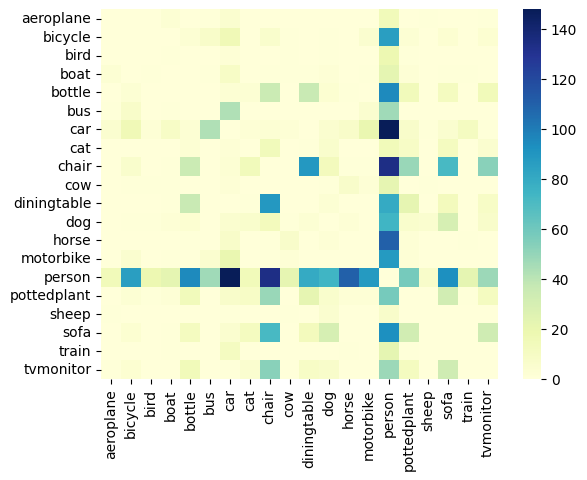

In [15]:
import torch

matrix = torch.zeros(20, 20)
for _, target in voc_dataset:
    objects = target['annotation']['object']
    indices = list(set([voc_classes.index(obj['name']) for obj in objects]))
    if len(indices) == 1:
        continue
    for idx1 in indices:
        for idx2 in indices:
            if idx1 == idx2:
                continue
            matrix[idx1][idx2] += 1

# 画热力图
import seaborn as sns
import numpy as np

matrix = np.array(matrix)
sns.heatmap(matrix, cmap='YlGnBu', xticklabels=voc_classes, yticklabels=voc_classes)
plt.show()

